### Exercício 3 (MNIST). Vamos comparar métodos de classificação para um problema clássico em machine learning: 
### classificação de imagem de dígitos no dataset MNIST. Rode o seguinte trecho de código para carregar os dados, 
### os modelos, realizar a divisão dos dados em treino e teste e visualizar algumas amostras contendo os dígitos.

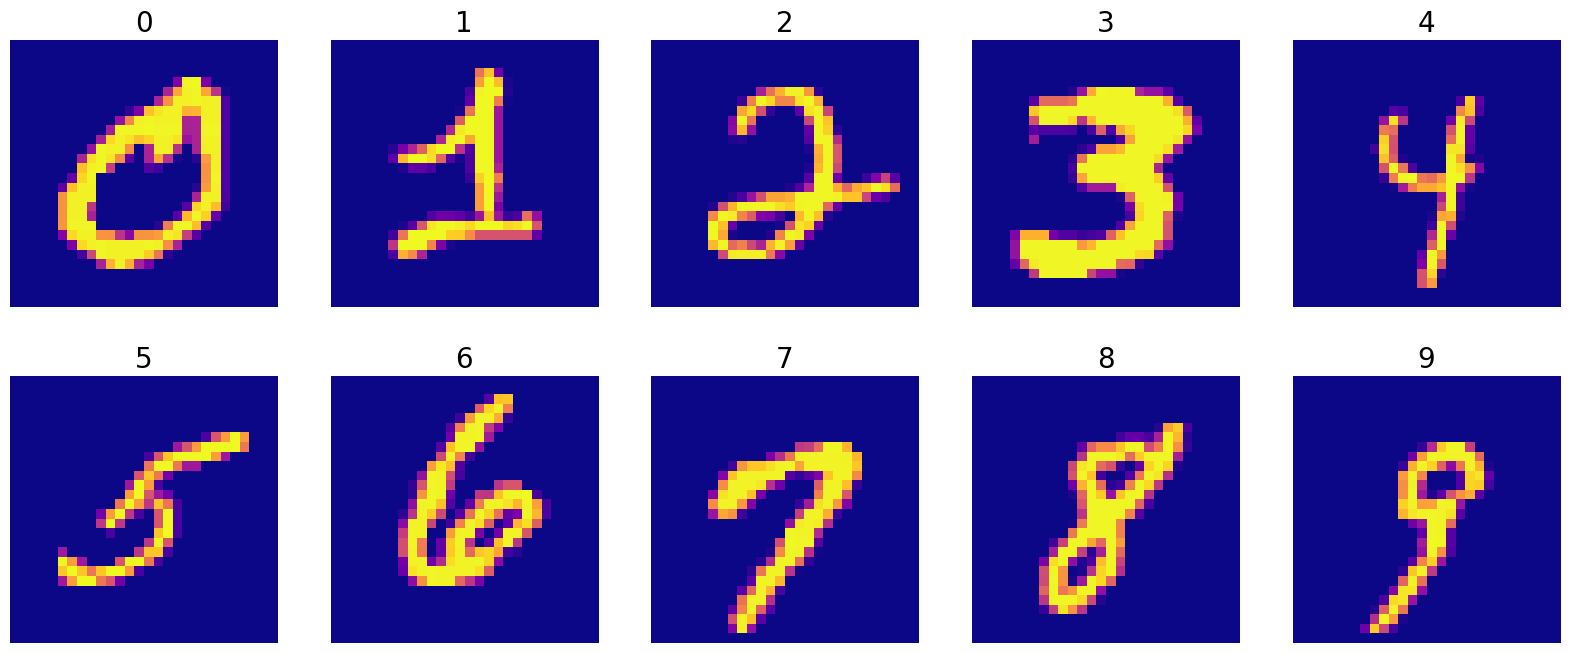

In [2]:
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
def plot_digits(images,
n_rows = 2,
n_cols = 5,
fig_shape = (20,8),
indexes = [0,1,2,3,4,5,6,7,8,9],
img_shape = (28,28),
labels = [0,1,2,3,4,5,6,7,8,9]):
    fig, axs = plt.subplots(n_rows, n_cols, figsize = fig_shape)
    ind = np.array(indexes).reshape(n_rows, n_cols)
    if labels:
        plt_labels = np.array(labels).reshape(n_rows, n_cols)
    for i in range(0,n_rows):
        for j in range(0,n_cols):
            if labels:
                axs[i,j].set_title(plt_labels[i,j], fontsize = 20)

            axs[i,j].imshow((images[ind[i,j]].reshape(img_shape)), cmap = "plasma")
            axs[i,j].axis('off')

mnist = fetch_openml("mnist_784") # Baixar os dados
X, y = mnist.data.to_numpy(), mnist.target.to_numpy()
X = X/255 # Colocar as features em [0, 1]
# Divisão em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X,
y,
test_size=0.2,
random_state=42)
# Plot dos digítos
plot_digits(X,n_rows = 2,n_cols = 5,indexes = [21, 24, 16, 27, 26, 35, 13, 15, 17, 19])

## (a) Defina os seguintes modelos:

In [6]:
nb = BernoulliNB(force_alpha=True) # Naive Bayes com features bernoulli
lda = LinearDiscriminantAnalysis() # LDA
qda = QuadraticDiscriminantAnalysis(reg_param=1e-2)  
lr = LogisticRegression(random_state=42) # Regressão Logística
knn = KNeighborsClassifier(n_neighbors=6) # kNN com k = 6
svc = svm.SVC(gamma="scale",class_weight="balanced",C=100) # SVM
rf = RandomForestClassifier(max_depth=30, random_state=0,n_estimators = 100) # Random forest
nn = MLPClassifier(random_state=42, hidden_layer_sizes = [100],max_iter=300) # Rede neural

### Treine cada um destes modelos nos dados de treino e calcule a acurácia no conjunto de treino e de teste. Compare a acurácia e o tempo (em segundos) para treinar e o tempo para gerar previsões obtido nos modelos vistos na primeira parte do curso (NB, LDA, QDA, Regressão Logística e KNN) com os vistos na segunda parte (SVM, random forests e redes neurais). Quais têm melhor acurácia? Quais rodam mais rápido?

In [9]:
import time
from sklearn.metrics import accuracy_score

models = [nb, lda, qda, lr, knn, svc, rf, nn]

results = {}
time_per_model = {}
pred_time_per_model = {}

for model in models:

    model_name = type(model).__name__

    print(model_name)
    start_time = time.perf_counter()
    model.fit(X_train, y_train)
    end_time = time.perf_counter()

    training_time = end_time - start_time
    time_per_model[model_name] = training_time

    pred_time_per_model[model_name] = []

    start_time = time.perf_counter()
    y_pred_train = model.predict(X_train)
    end_time = time.perf_counter()
    training_time = end_time - start_time
    pred_time_per_model[model_name].append(training_time)

    start_time = time.perf_counter()
    y_pred_test = model.predict(X_test)
    end_time = time.perf_counter()
    training_time = end_time - start_time
    pred_time_per_model[model_name].append(training_time)
    

    train_acc = accuracy_score(y_train, y_pred_train)
    test_acc = accuracy_score(y_test, y_pred_test)

    results[model_name] = {
        "train_accuracy": train_acc,
        "test_accuracy": test_acc
    }

for model_name in results:
    print(f"\nModelo: {model_name}")
    print(f"Train Accuracy: {results[model_name]['train_accuracy']:.4f}")
    print(f"Test Accuracy:  {results[model_name]['test_accuracy']:.4f}")
    print(f"Tempo de treino: {time_per_model[model_name]:.6f} segundos")
    print(f"Tempo para gerar previsões: Treino = {pred_time_per_model[model_name][0]}, Teste = {pred_time_per_model[model_name][1]}")


BernoulliNB
LinearDiscriminantAnalysis
QuadraticDiscriminantAnalysis
LogisticRegression


/Users/gabri/Classes/MachineLearning2026/venv/lib/python3.14/site-packages/sklearn/linear_model/_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


KNeighborsClassifier
SVC
RandomForestClassifier
MLPClassifier

Modelo: BernoulliNB
Train Accuracy: 0.8319
Test Accuracy:  0.8349
Tempo de treino: 0.301939 segundos
Tempo para gerar previsões: Treino = 0.17006133299946669, Teste = 0.04621579199738335

Modelo: LinearDiscriminantAnalysis
Train Accuracy: 0.8727
Test Accuracy:  0.8677
Tempo de treino: 5.065452 segundos
Tempo para gerar previsões: Treino = 0.02716787500321516, Teste = 0.007279041998117464

Modelo: QuadraticDiscriminantAnalysis
Train Accuracy: 0.9574
Test Accuracy:  0.9429
Tempo de treino: 3.408824 segundos
Tempo para gerar previsões: Treino = 3.675797625000996, Teste = 0.9685718340006133

Modelo: LogisticRegression
Train Accuracy: 0.9363
Test Accuracy:  0.9203
Tempo de treino: 4.158048 segundos
Tempo para gerar previsões: Treino = 0.026816333000169834, Teste = 0.007162000001699198

Modelo: KNeighborsClassifier
Train Accuracy: 0.9786
Test Accuracy:  0.9690
Tempo de treino: 0.069118 segundos
Tempo para gerar previsões: Treino 

In [11]:
for model_name in results:
    print(f"\nModelo: {model_name}")
    print(f"Train Accuracy: {results[model_name]['train_accuracy']:.4f}")
    print(f"Test Accuracy:  {results[model_name]['test_accuracy']:.4f}")
    print(f"Tempo de treino: {time_per_model[model_name]:.6f} segundos")
    print(f"Tempo para gerar previsões: Treino = {pred_time_per_model[model_name][0]:.6f} segundos, Teste = {pred_time_per_model[model_name][1]:.6f} segundos")


Modelo: BernoulliNB
Train Accuracy: 0.8319
Test Accuracy:  0.8349
Tempo de treino: 0.301939 segundos
Tempo para gerar previsões: Treino = 0.170061 segundos, Teste = 0.046216 segundos

Modelo: LinearDiscriminantAnalysis
Train Accuracy: 0.8727
Test Accuracy:  0.8677
Tempo de treino: 5.065452 segundos
Tempo para gerar previsões: Treino = 0.027168 segundos, Teste = 0.007279 segundos

Modelo: QuadraticDiscriminantAnalysis
Train Accuracy: 0.9574
Test Accuracy:  0.9429
Tempo de treino: 3.408824 segundos
Tempo para gerar previsões: Treino = 3.675798 segundos, Teste = 0.968572 segundos

Modelo: LogisticRegression
Train Accuracy: 0.9363
Test Accuracy:  0.9203
Tempo de treino: 4.158048 segundos
Tempo para gerar previsões: Treino = 0.026816 segundos, Teste = 0.007162 segundos

Modelo: KNeighborsClassifier
Train Accuracy: 0.9786
Test Accuracy:  0.9690
Tempo de treino: 0.069118 segundos
Tempo para gerar previsões: Treino = 24.617561 segundos, Teste = 6.213446 segundos

Modelo: SVC
Train Accuracy: 1

## (b) Para cada um dos gráficos gerados pelos códigos abaixo, explique o que está sendo mostrado, como isso se relaciona com as previsões do modelo em questão e se é possível interpretar com facilidade o que está acontecendo.

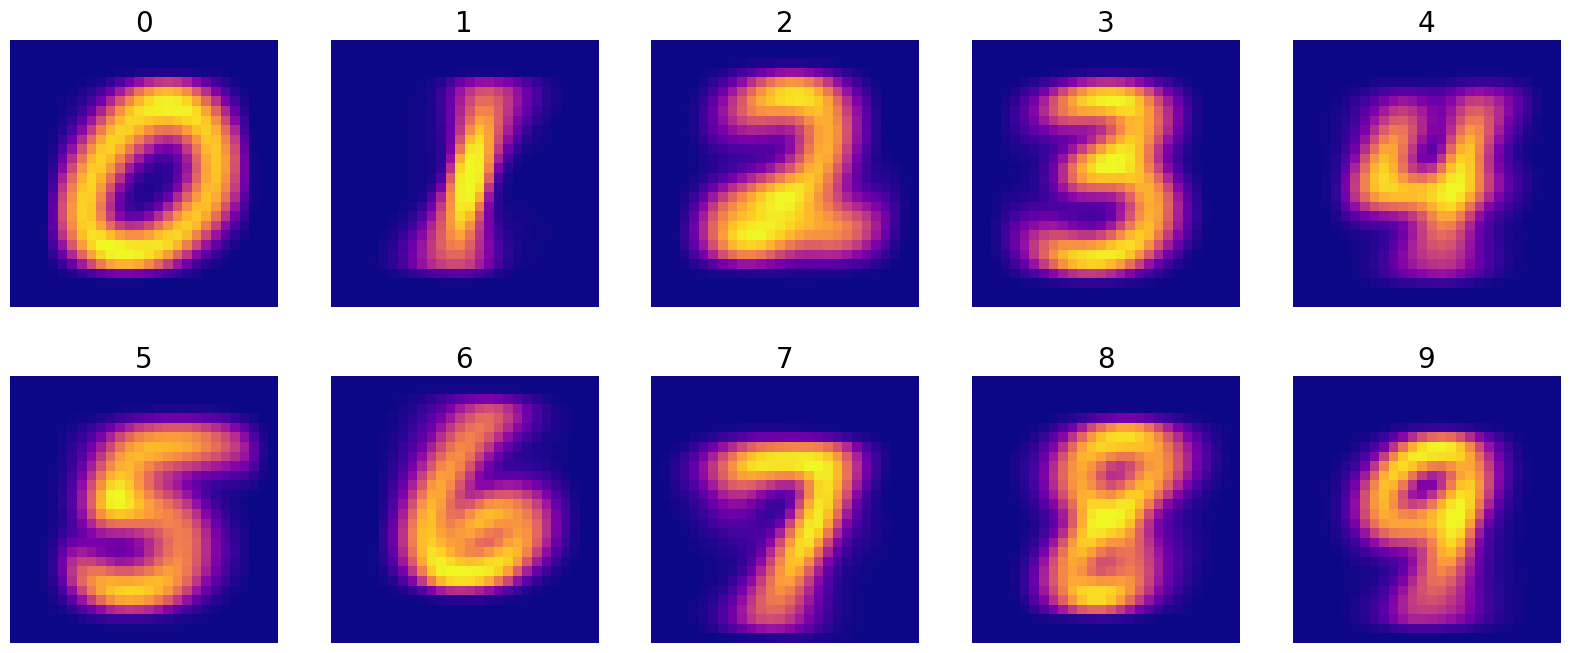

In [12]:
nb_params = {}
for i in range(0,10):
    nb_params[i] = np.exp(nb.feature_log_prob_[i])
plot_digits(nb_params)

In [19]:
print(nb.feature_log_prob_[1])
print(np.exp(nb.feature_log_prob_[1]))

[-8.74496601e+00 -8.74496601e+00 -8.74496601e+00 -8.74496601e+00
 -8.74496601e+00 -8.74496601e+00 -8.74496601e+00 -8.74496601e+00
 -8.74496601e+00 -8.74496601e+00 -8.74496601e+00 -8.74496601e+00
 -8.74496601e+00 -8.74496601e+00 -8.74496601e+00 -8.74496601e+00
 -8.74496601e+00 -8.74496601e+00 -8.74496601e+00 -8.74496601e+00
 -8.74496601e+00 -8.74496601e+00 -8.74496601e+00 -8.74496601e+00
 -8.74496601e+00 -8.74496601e+00 -8.74496601e+00 -8.74496601e+00
 -8.74496601e+00 -8.74496601e+00 -8.74496601e+00 -8.74496601e+00
 -8.74496601e+00 -8.74496601e+00 -8.74496601e+00 -8.74496601e+00
 -8.74496601e+00 -8.74496601e+00 -8.74496601e+00 -8.74496601e+00
 -8.74496601e+00 -8.74496601e+00 -7.64635372e+00 -7.64635372e+00
 -7.64635372e+00 -8.74496601e+00 -8.74496601e+00 -8.74496601e+00
 -8.74496601e+00 -8.74496601e+00 -8.74496601e+00 -8.74496601e+00
 -8.74496601e+00 -8.74496601e+00 -8.74496601e+00 -8.74496601e+00
 -8.74496601e+00 -8.74496601e+00 -8.74496601e+00 -8.74496601e+00
 -8.74496601e+00 -8.74496

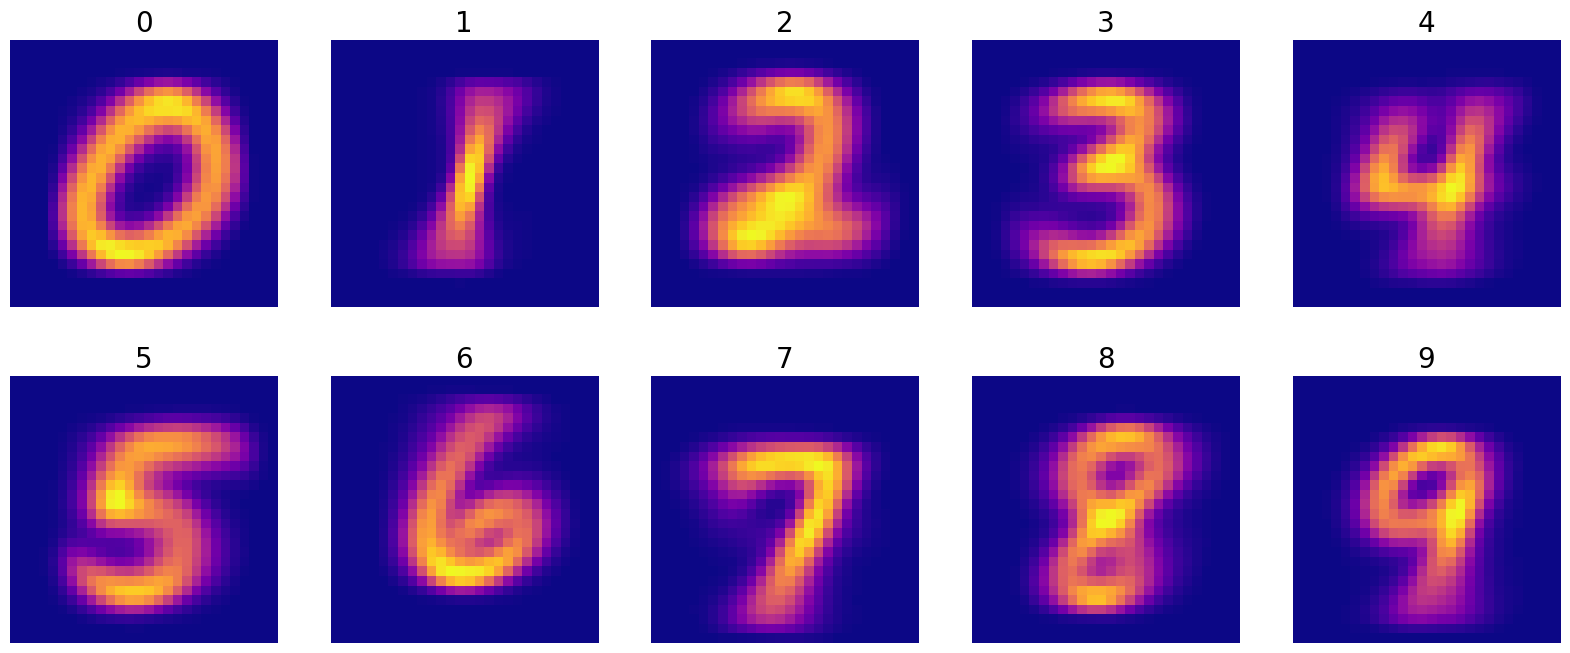

In [14]:
lda_params = {}
for i in range(0,10):
    lda_params[i] = lda.means_[i]
plot_digits(lda_params)

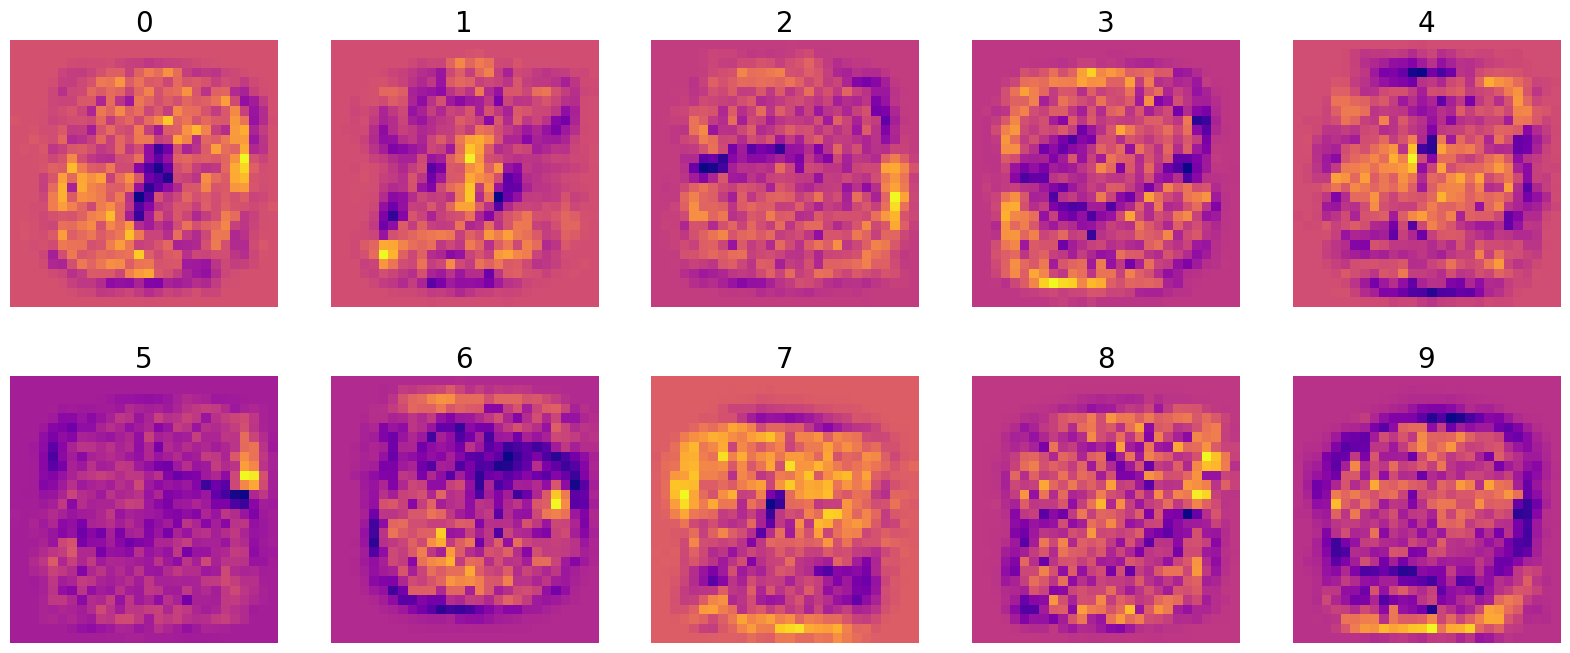

In [20]:
log_reg_params = {}
for i in range(0,10):
    log_reg_params[i] = lr.coef_[i]
plot_digits(log_reg_params)